In [1]:
from numpy.lib.function_base import _gradient_dispatcher
from ZAtomTyping import TypingNet, TypingUtility, TypingNetExplainer
import torch as th

if __name__=='__main__':
    # Set up options.
    root_dir = "TrainedModels/"
    typing_fn = root_dir+"top_all36_cgenff-sub.rtf"
    params_fn = root_dir+"top_all36_cgenff-sub-12000"
    training_ratio = 0.8
    learning_rate = 5.E-3
    max_epochs = -100000  # Set a negative one, we will use parameters without re-optimization.
    output_freq = 1
    device = th.device("cuda:0" if th.cuda.is_available() else "cpu")       

    # Build typing model.    
    typing_utility = TypingUtility()
    typing_utility.Build(typing_fn,
        params_fn = params_fn,
        training_ratio = training_ratio,
        learning_rate = learning_rate,
        max_epochs = max_epochs,
        output_freq = output_freq,
        device = device)
    print("")
    
    # Benchmark.    
    """print("Net Structure:")
    typing_utility.net.print()
    print("Net Calibration:")
    type_stats = typing_utility.Calibrate()
    print("%8s %8s %8s %8s" % ("Type", "#All", "#Fail", "Failure(%)"))
    num_wrong_labels = 0
    num_labels = 0
    for element, stats in type_stats.items():
        for i, (num_labs, num_wrong_labs) in enumerate(stats):
            print("%8s %8d %8d %8.2f" % (typing_utility.data.atomic_types[element][i], num_labs, num_wrong_labs,
                num_wrong_labs/num_labs*100 if num_labs != 0 else 0))
            num_labels += num_labs
            num_wrong_labels += num_wrong_labs
    print("%8s: %7d %8d" % ("Total", num_labels, num_wrong_labels))
    print("Correctness ratio: %.2f%%" % ((1-num_wrong_labels/num_labels)*100))"""

    # Application.
    print(" -- Apply with one example --")
    test_fn = "1uml-dl.txt"
    residue, (types, probs) = typing_utility.Predict(test_fn)
    print("Name: %s" % (residue[2]))
    (types, probs) = typing_utility.PredictResidue(residue)
    for i, (type, prob) in enumerate(zip(types, probs)):
        indices = prob.topk(3).indices
        element = residue[0].ndata[typing_utility.data.features_str][i][0].item()
        print("%3d: %8s (%.4f); %8s (%.4f); %8s (%.4f)" % (i+1, 
            typing_utility.data.atomic_types[element][indices[0]], prob[indices[0]],
            typing_utility.data.atomic_types[element][indices[1]], prob[indices[1]],
            typing_utility.data.atomic_types[element][indices[2]], prob[indices[2]]
            ))
    
    # Export paramters.
    """fn = "AtomTyperData.h"
    typing_utility.ExportParams(fn)"""


Using backend: pytorch


 -- Build Atom Typing Predictor --
Definitions from:  TrainedModels/top_all36_cgenff-sub.rtf
 Atomic types: 158
  H : 25  ['HGA1', 'HGA2', 'HGA3', 'HGA4', 'HGA5', 'HGA6', 'HGA7', 'HGAAM0', 'HGAAM1', 'HGAAM2', 'HGP1', 'HGP2', 'HGP3', 'HGP4', 'HGP5', 'HGPAM1', 'HGPAM2', 'HGPAM3', 'HGR51', 'HGR52', 'HGR53', 'HGR61', 'HGR62', 'HGR63', 'HGR71']
  BR: 4   ['BRGA1', 'BRGA2', 'BRGA3', 'BRGR1']
  B : 1   ['BG201']
  C : 58  ['CG1T1', 'CG1T2', 'CG1N1', 'CG2D1', 'CG2D2', 'CG2D1O', 'CG2D2O', 'CG2DC1', 'CG2DC2', 'CG2DC3', 'CG2N1', 'CG2N2', 'CG2O1', 'CG2O2', 'CG2O3', 'CG2O4', 'CG2O5', 'CG2O6', 'CG2O7', 'CG2R51', 'CG2R52', 'CG2R53', 'CG2R57', 'CG25C1', 'CG25C2', 'CG251O', 'CG252O', 'CG2R61', 'CG2R62', 'CG2R63', 'CG2R64', 'CG2R66', 'CG2R67', 'CG2RC0', 'CG2R71', 'CG2RC7', 'CG301', 'CG302', 'CG311', 'CG312', 'CG314', 'CG321', 'CG322', 'CG323', 'CG324', 'CG331', 'CG334', 'CG3AM0', 'CG3AM1', 'CG3AM2', 'CG3C31', 'CG3C41', 'CG3C50', 'CG3C51', 'CG3C52', 'CG3C53', 'CG3C54', 'CG3RC1']
  N : 29  ['NG1T1', 'NG2D

 -- Explanation --


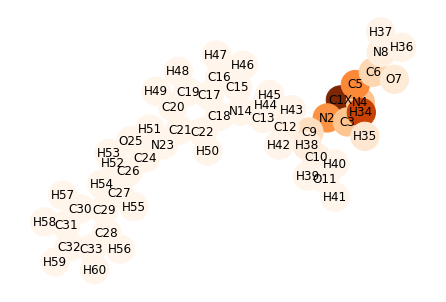

tensor([4.3230e+00, 2.0830e+00, 1.2660e+00, 1.3151e+00, 2.2284e+00, 8.9688e-01,
        3.7600e-01, 2.3562e-01, 7.1244e-01, 1.4130e-01, 2.9518e-02, 1.4029e-01,
        2.0481e-02, 1.9587e-03, 2.0017e-04, 0.0000e+00, 0.0000e+00, 2.0017e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4021e+00, 5.2070e-01, 7.8822e-02,
        7.8822e-02, 2.7009e-01, 4.1258e-02, 4.1258e-02, 7.2723e-03, 4.1491e-02,
        4.1491e-02, 3.3925e-03, 3.3925e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


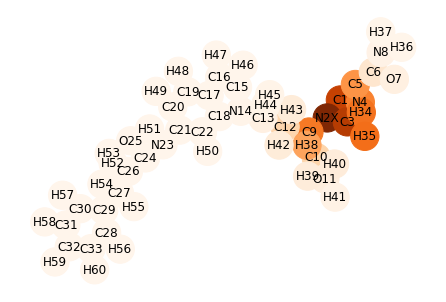

tensor([2.6733e+00, 3.3654e+00, 2.8058e+00, 1.8100e+00, 1.5988e+00, 4.2557e-01,
        1.5013e-01, 8.8610e-02, 1.9111e+00, 7.5506e-01, 2.0241e-01, 7.4147e-01,
        1.4189e-01, 2.6988e-02, 3.1520e-03, 4.0681e-04, 4.0681e-04, 3.1520e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0681e-04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9931e+00, 2.0380e+00, 1.7545e-02,
        1.7545e-02, 1.4025e+00, 2.6278e-01, 2.6278e-01, 9.3903e-02, 2.6425e-01,
        2.6425e-01, 4.7465e-02, 4.7465e-02, 7.0462e-04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


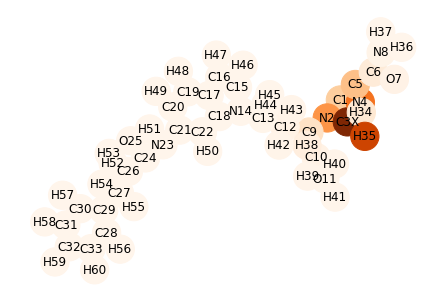

tensor([1.3234e+00, 2.4053e+00, 5.1036e+00, 3.0256e+00, 1.5881e+00, 4.1982e-01,
        1.3705e-01, 7.9408e-02, 7.6931e-01, 1.5054e-01, 3.0034e-02, 1.4947e-01,
        2.0841e-02, 2.0560e-03, 1.9808e-04, 0.0000e+00, 0.0000e+00, 1.9808e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.3462e-01, 3.9747e+00, 1.5912e-02,
        1.5912e-02, 2.8756e-01, 4.2087e-02, 4.2087e-02, 7.6222e-03, 4.2342e-02,
        4.2342e-02, 3.5612e-03, 3.5612e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


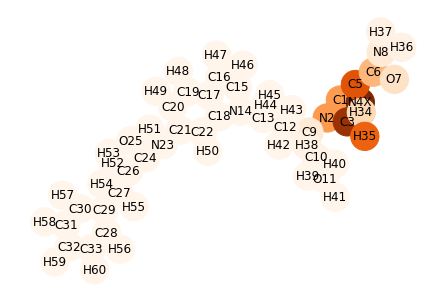

tensor([2.7515e+00, 2.7900e+00, 5.6175e+00, 6.1878e+00, 4.3721e+00, 2.1092e+00,
        9.2702e-01, 5.9165e-01, 6.0094e-01, 9.7833e-02, 1.1004e-02, 9.7497e-02,
        7.8305e-03, 7.4906e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1918e+00, 4.0225e+00, 2.2394e-01,
        2.2394e-01, 1.9591e-01, 1.5563e-02, 1.5563e-02, 2.5542e-03, 1.5661e-02,
        1.5661e-02, 1.2974e-03, 1.2974e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


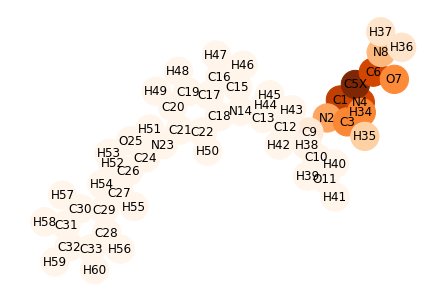

tensor([2.7836e+00, 1.4100e+00, 1.8058e+00, 2.6361e+00, 3.4394e+00, 2.6274e+00,
        1.7569e+00, 1.1459e+00, 3.1413e-01, 4.4013e-02, 5.2792e-03, 4.3955e-02,
        3.7718e-03, 2.6031e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8250e+00, 8.3346e-01, 4.7072e-01,
        4.7072e-01, 8.9626e-02, 7.4660e-03, 7.4660e-03, 8.8155e-04, 7.5436e-03,
        7.5436e-03, 4.5087e-04, 4.5087e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


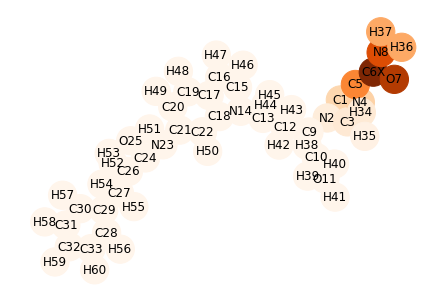

tensor([1.1967e+00, 4.0967e-01, 5.6879e-01, 1.3522e+00, 2.9785e+00, 5.6694e+00,
        4.7642e+00, 4.1344e+00, 6.4442e-02, 5.8857e-03, 4.5697e-04, 5.8857e-03,
        3.2313e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4294e-01, 1.9675e-01, 2.2312e+00,
        2.2312e+00, 1.1771e-02, 6.4626e-04, 6.4626e-04, 0.0000e+00, 6.4626e-04,
        6.4626e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


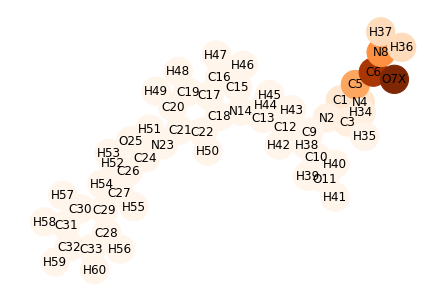

tensor([5.8058e-01, 1.7446e-01, 2.4107e-01, 6.5698e-01, 2.1231e+00, 4.5295e+00,
        5.2373e+00, 2.5455e+00, 1.9066e-02, 1.6588e-03, 0.0000e+00, 1.6588e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5840e-01, 5.3903e-02, 9.5251e-01,
        9.5251e-01, 3.3176e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


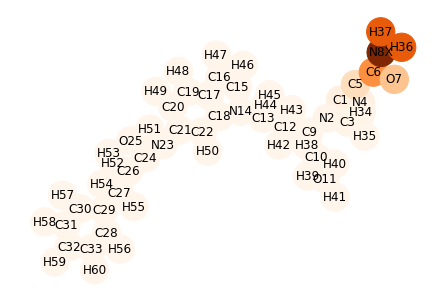

tensor([4.8556e-01, 1.2569e-01, 1.7308e-01, 5.6649e-01, 2.0687e+00, 5.9082e+00,
        3.5690e+00, 1.2026e+01, 1.2314e-02, 9.2509e-04, 0.0000e+00, 9.2509e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8732e-01, 3.6138e-02, 8.1681e+00,
        8.1681e+00, 1.8502e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


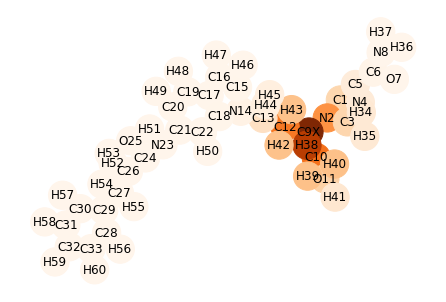

tensor([7.1451e-01, 1.6022e+00, 7.2801e-01, 2.8293e-01, 2.5091e-01, 4.7274e-02,
        9.8766e-03, 5.7023e-03, 3.3326e+00, 1.9822e+00, 7.9748e-01, 1.9106e+00,
        5.3285e-01, 1.0376e-01, 2.0206e-02, 2.7558e-03, 2.8312e-03, 1.9965e-02,
        2.5927e-04, 0.0000e+00, 2.5927e-04, 2.5905e-03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3345e-01, 3.3251e-01, 8.0786e-04,
        8.0786e-04, 2.7547e+00, 1.0158e+00, 1.0158e+00, 3.9958e-01, 1.0131e+00,
        1.0131e+00, 1.8225e-01, 1.8225e-01, 4.3240e-03, 4.1699e-04, 0.0000e+00,
        0.0000e+00, 4.4907e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


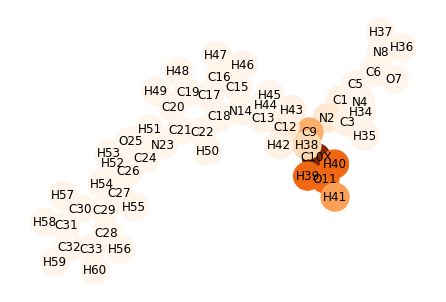

tensor([1.4658e-01, 5.3541e-01, 1.4810e-01, 4.0565e-02, 3.5039e-02, 4.4126e-03,
        6.0717e-04, 3.5055e-04, 1.8470e+00, 4.9622e+00, 3.0591e+00, 5.0558e-01,
        9.2720e-02, 1.4179e-02, 1.7801e-03, 1.7133e-04, 1.7133e-04, 1.7801e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7133e-04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.1120e-02, 5.1046e-02, 0.0000e+00,
        0.0000e+00, 9.9005e-01, 3.1236e+00, 3.1236e+00, 2.1160e+00, 1.7653e-01,
        1.7653e-01, 2.5097e-02, 2.5097e-02, 2.9675e-04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


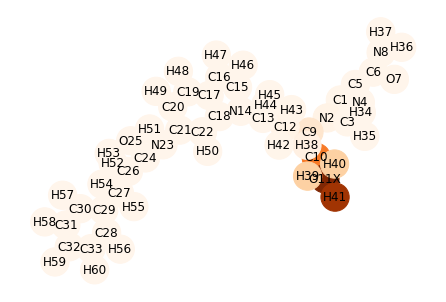

tensor([3.4233e-02, 1.9801e-01, 3.4341e-02, 5.3112e-03, 4.5043e-03, 3.0441e-04,
        0.0000e+00, 0.0000e+00, 1.0843e+00, 4.7873e+00, 8.4688e+00, 1.7914e-01,
        2.1938e-02, 2.0111e-03, 1.5264e-04, 0.0000e+00, 0.0000e+00, 1.5264e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0181e-03, 6.9840e-03, 0.0000e+00,
        0.0000e+00, 3.5093e-01, 2.1092e+00, 2.1092e+00, 7.5329e+00, 4.3797e-02,
        4.3797e-02, 3.4833e-03, 3.4833e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


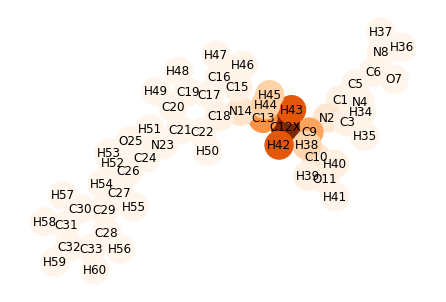

tensor([1.5310e-01, 5.4558e-01, 1.5462e-01, 4.2811e-02, 3.7009e-02, 4.6383e-03,
        6.2325e-04, 3.5983e-04, 1.8718e+00, 5.2570e-01, 1.3728e-01, 4.6016e+00,
        2.2152e+00, 6.0604e-01, 1.5989e-01, 3.6053e-02, 3.5167e-02, 1.5292e-01,
        4.5285e-03, 7.3915e-04, 4.0810e-03, 3.1833e-02, 3.6752e-04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.3942e-02, 5.3820e-02, 0.0000e+00,
        0.0000e+00, 1.0004e+00, 1.8332e-01, 1.8332e-01, 5.3084e-02, 3.1939e+00,
        3.1939e+00, 1.0830e+00, 1.0830e+00, 5.5416e-02, 7.3474e-03, 6.4369e-04,
        0.0000e+00, 7.0686e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


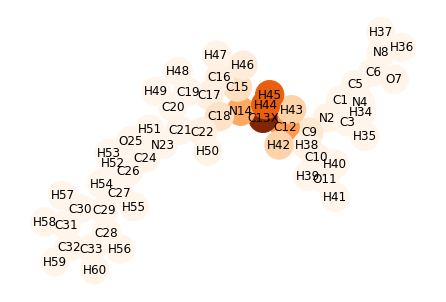

tensor([1.7303e-02, 8.8932e-02, 1.7353e-02, 2.9313e-03, 2.5102e-03, 2.0333e-04,
        0.0000e+00, 0.0000e+00, 4.5073e-01, 8.2272e-02, 1.6051e-02, 1.8362e+00,
        4.0568e+00, 1.6021e+00, 6.5144e-01, 2.1074e-01, 1.9856e-01, 6.0010e-01,
        3.9859e-02, 9.7787e-03, 3.5557e-02, 1.7616e-01, 4.7347e-03, 4.1772e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.8261e-03, 3.7933e-03, 0.0000e+00,
        0.0000e+00, 1.5737e-01, 2.2495e-02, 2.2495e-02, 4.0025e-03, 9.1932e-01,
        9.1932e-01, 2.6821e+00, 2.6821e+00, 2.9205e-01, 6.6648e-02, 8.7365e-03,
        1.4386e-03, 6.2226e-02, 7.2350e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


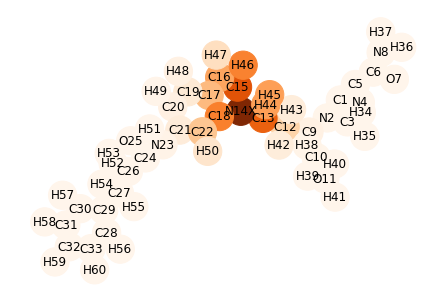

tensor([2.5840e-03, 2.4072e-02, 2.5840e-03, 4.6395e-04, 3.7882e-04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.2408e-01, 2.1456e-02, 2.2445e-03, 7.7349e-01,
        2.1994e+00, 3.3664e+00, 2.3811e+00, 1.3678e+00, 1.1071e+00, 1.8288e+00,
        3.2005e-01, 1.3296e-01, 2.5800e-01, 9.6858e-01, 6.3101e-02, 7.3865e-03,
        1.7888e-03, 8.9440e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5613e-04, 6.5613e-04, 0.0000e+00,
        0.0000e+00, 4.2698e-02, 3.1742e-03, 3.1742e-03, 6.5620e-04, 2.4236e-01,
        2.4236e-01, 1.4542e+00, 1.4542e+00, 1.8120e+00, 5.5760e-01, 1.2305e-01,
        2.7772e-02, 4.3438e-01, 1.2794e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


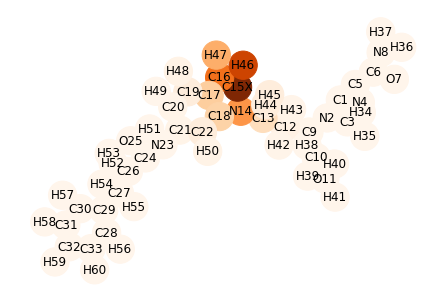

tensor([1.8517e-04, 1.8451e-03, 1.8517e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.8919e-02, 1.5979e-03, 1.7009e-04, 1.3447e-01,
        7.1649e-01, 1.9253e+00, 4.0859e+00, 2.4505e+00, 1.0586e+00, 9.6688e-01,
        2.6662e-01, 5.7781e-02, 5.6973e-02, 2.6180e-01, 6.8497e-03, 5.8580e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.1958e-03, 2.4054e-04, 2.4054e-04, 0.0000e+00, 3.8803e-02,
        3.8803e-02, 2.5720e-01, 2.5720e-01, 3.1782e+00, 1.5425e+00, 8.9484e-02,
        1.1127e-02, 9.0324e-02, 1.0146e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


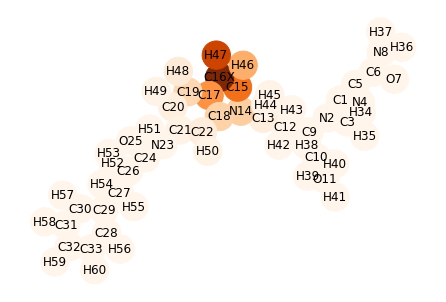

tensor([0.0000e+00, 2.2564e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.7208e-03, 1.9541e-04, 0.0000e+00, 3.4859e-02,
        2.4700e-01, 1.1138e+00, 2.6001e+00, 4.3263e+00, 2.0880e+00, 1.0334e+00,
        8.8149e-01, 2.3544e-01, 9.9899e-02, 2.8355e-01, 1.2251e-02, 1.1935e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.9082e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4415e-03,
        5.4415e-03, 7.0598e-02, 7.0598e-02, 1.6356e+00, 3.3642e+00, 3.7934e-01,
        8.1744e-02, 9.6938e-02, 2.0672e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


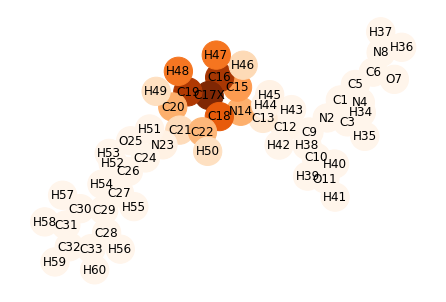

tensor([0.0000e+00, 2.6856e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.7626e-03, 2.3258e-04, 0.0000e+00, 4.2011e-02,
        2.9449e-01, 1.1481e+00, 1.3759e+00, 2.6681e+00, 3.0734e+00, 2.0775e+00,
        2.6168e+00, 1.1502e+00, 5.5339e-01, 1.0510e+00, 1.1417e-01, 1.5142e-02,
        2.3440e-03, 1.1720e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.6517e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.5251e-03,
        7.5251e-03, 8.5254e-02, 8.5254e-02, 5.9363e-01, 1.8002e+00, 1.7871e+00,
        5.0301e-01, 4.9629e-01, 2.6226e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


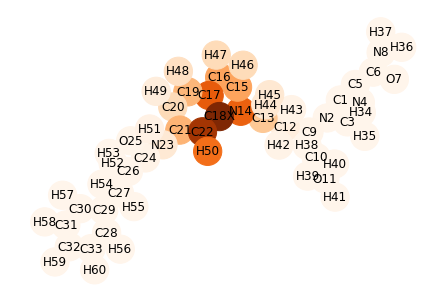

tensor([2.2738e-04, 2.6454e-03, 2.2738e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.4763e-02, 2.2910e-03, 2.0886e-04, 1.8080e-01,
        8.7352e-01, 2.0543e+00, 1.2907e+00, 1.2990e+00, 2.1256e+00, 3.1380e+00,
        1.0749e+00, 5.9214e-01, 1.1078e+00, 2.7628e+00, 3.0821e-01, 6.0107e-02,
        1.3179e-02, 6.5894e-03, 4.3467e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.5820e-03, 2.9537e-04, 2.9537e-04, 0.0000e+00, 5.0772e-02,
        5.0772e-02, 3.4655e-01, 3.4655e-01, 5.8262e-01, 5.8389e-01, 4.9740e-01,
        2.0427e-01, 1.9120e+00, 1.0506e-01, 8.6934e-04, 8.6934e-04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


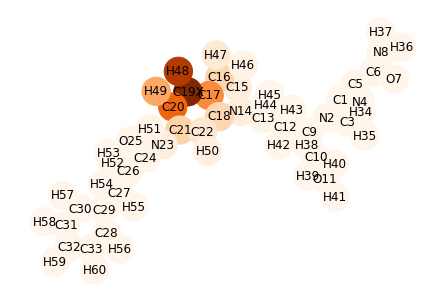

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.7847e-04, 0.0000e+00, 0.0000e+00, 4.8487e-03,
        5.1757e-02, 2.9983e-01, 3.1327e-01, 9.4037e-01, 2.2336e+00, 9.1613e-01,
        4.3869e+00, 2.7969e+00, 1.0075e+00, 5.2524e-01, 2.7019e-01, 5.2026e-02,
        1.1476e-02, 5.7379e-03, 3.8145e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.5694e-04,
        5.5694e-04, 9.6973e-03, 9.6973e-03, 1.0004e-01, 4.3240e-01, 3.6985e+00,
        1.7230e+00, 1.8382e-01, 9.1029e-02, 7.6290e-04, 7.6290e-04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


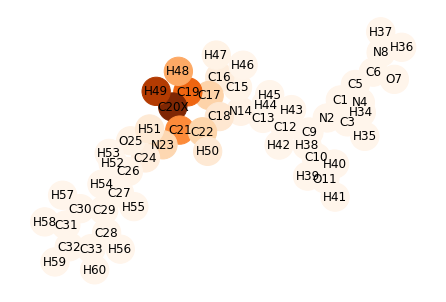

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.8766e-04,
        1.2519e-02, 1.0415e-01, 6.5186e-02, 2.6345e-01, 9.7146e-01, 4.8174e-01,
        2.6789e+00, 4.1915e+00, 2.1152e+00, 9.4193e-01, 8.8348e-01, 2.4270e-01,
        8.3297e-02, 4.1015e-02, 3.7935e-03, 0.0000e+00, 2.7566e-04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.5753e-03, 1.5753e-03, 1.3260e-02, 8.9298e-02, 1.6521e+00,
        3.5362e+00, 4.2415e-01, 4.0707e-01, 7.5871e-03, 7.5871e-03, 4.7746e-04,
        4.7746e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


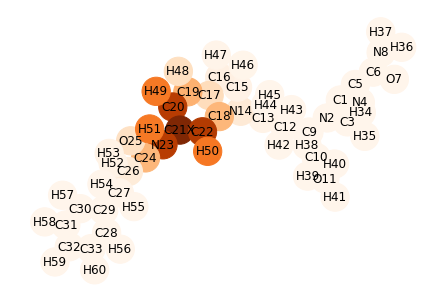

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.9969e-04, 0.0000e+00, 0.0000e+00, 4.7435e-03,
        4.9795e-02, 2.7225e-01, 7.2565e-02, 1.1827e-01, 5.2812e-01, 1.0074e+00,
        1.0772e+00, 2.4471e+00, 2.9428e+00, 2.4815e+00, 2.4420e+00, 1.0016e+00,
        4.5448e-01, 2.3775e-01, 3.3609e-02, 3.1132e-04, 3.4018e-03, 3.1132e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.9937e-04,
        5.9937e-04, 9.4870e-03, 9.4870e-03, 1.5470e-02, 2.6654e-02, 4.7173e-01,
        1.6670e+00, 1.6912e+00, 1.6671e+00, 6.8159e-02, 6.8159e-02, 5.8921e-03,
        5.8921e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


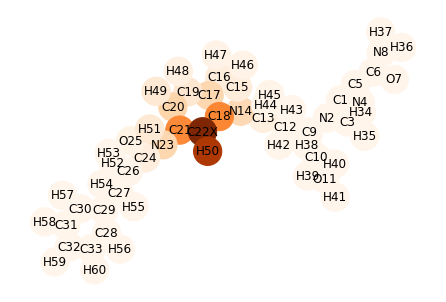

tensor([0.0000e+00, 2.2294e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.8800e-03, 1.9307e-04, 0.0000e+00, 3.1626e-02,
        2.1695e-01, 8.2444e-01, 2.9792e-01, 3.0351e-01, 8.7941e-01, 2.1610e+00,
        4.9182e-01, 9.3185e-01, 2.1156e+00, 4.1434e+00, 8.8428e-01, 2.4189e-01,
        8.2898e-02, 4.0820e-02, 3.7668e-03, 0.0000e+00, 2.7372e-04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.8615e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.7600e-03,
        5.7600e-03, 6.4274e-02, 6.4274e-02, 9.8222e-02, 9.9014e-02, 1.6944e-01,
        4.1631e-01, 3.5448e+00, 4.0576e-01, 7.5336e-03, 7.5336e-03, 4.7409e-04,
        4.7409e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


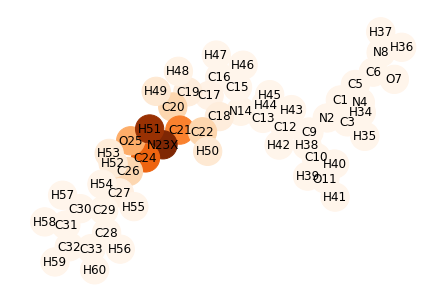

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.3617e-04,
        8.2293e-03, 6.5963e-02, 1.1134e-02, 1.9265e-02, 1.3002e-01, 3.3451e-01,
        3.4606e-01, 1.1379e+00, 2.8810e+00, 1.1537e+00, 5.3359e+00, 3.4222e+00,
        2.0424e+00, 1.1154e+00, 2.2347e-01, 4.2957e-03, 3.3184e-02, 4.2957e-03,
        3.8442e-04, 0.0000e+00, 3.8442e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0723e-03, 1.0723e-03, 1.4298e-03, 2.8258e-03, 1.1467e-01,
        5.5569e-01, 5.6252e-01, 4.8978e+00, 4.2462e-01, 4.2462e-01, 5.8320e-02,
        5.8320e-02, 6.6584e-04, 6.6584e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


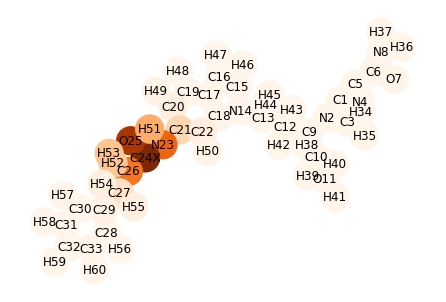

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0455e-04, 7.1532e-03, 6.9807e-04, 1.3434e-03, 1.3930e-02, 5.4904e-02,
        5.5277e-02, 2.7758e-01, 1.0103e+00, 2.7925e-01, 3.0144e+00, 4.7311e+00,
        4.0850e+00, 2.7611e+00, 7.3658e-01, 2.7044e-02, 1.4099e-01, 2.7044e-02,
        3.2953e-03, 6.2331e-04, 3.2953e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1738e-02,
        9.4193e-02, 9.4842e-02, 1.8014e+00, 1.3815e+00, 1.3815e+00, 2.4957e-01,
        2.4957e-01, 5.7076e-03, 5.7076e-03, 5.3980e-04, 0.0000e+00, 5.3980e-04],
       grad_fn=<SumBackward1>)


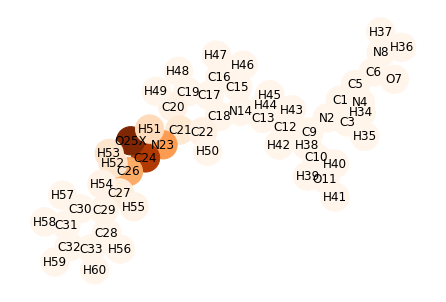

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.5625e-03, 0.0000e+00, 0.0000e+00, 5.0515e-03, 1.7582e-02,
        1.7427e-02, 1.4650e-01, 5.5445e-01, 1.4738e-01, 2.3378e+00, 4.4688e+00,
        5.2850e+00, 2.0235e+00, 3.7709e-01, 8.6942e-03, 7.4767e-02, 8.6942e-03,
        1.2416e-03, 0.0000e+00, 1.2416e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.3110e-03,
        3.0184e-02, 3.0454e-02, 9.5399e-01, 6.7874e-01, 6.7874e-01, 1.3239e-01,
        1.3239e-01, 2.1504e-03, 2.1504e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       grad_fn=<SumBackward1>)


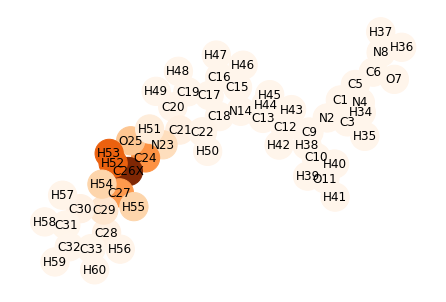

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0573e-04, 0.0000e+00, 0.0000e+00, 9.9620e-04, 5.4358e-03,
        5.4004e-03, 4.3036e-02, 2.1880e-01, 4.3187e-02, 9.1560e-01, 2.5174e+00,
        1.5086e+00, 5.2261e+00, 2.3851e+00, 1.6741e-01, 6.4996e-01, 1.6741e-01,
        3.3196e-02, 8.0482e-03, 3.3196e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.4953e-04,
        9.3537e-03, 9.4150e-03, 3.8322e-01, 3.4296e+00, 3.4296e+00, 1.1806e+00,
        1.1806e+00, 5.7358e-02, 5.7358e-02, 6.9700e-03, 1.2840e-03, 6.9700e-03],
       grad_fn=<SumBackward1>)


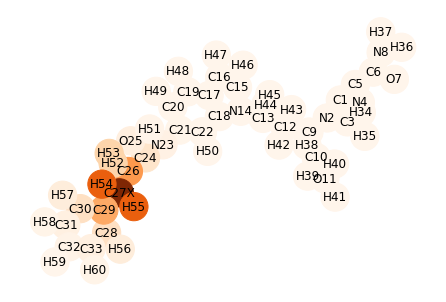

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3992e-04,
        3.3992e-04, 3.6855e-03, 2.9278e-02, 3.6855e-03, 1.5704e-01, 6.5359e-01,
        2.6081e-01, 2.2169e+00, 4.8582e+00, 7.6597e-01, 1.9008e+00, 7.6597e-01,
        2.1142e-01, 7.9579e-02, 2.1142e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.8876e-04, 5.8876e-04, 5.1816e-02, 1.0992e+00, 1.0992e+00, 3.2157e+00,
        3.2157e+00, 3.4395e-01, 3.4395e-01, 7.0289e-02, 1.7240e-02, 7.0289e-02],
       grad_fn=<SumBackward1>)


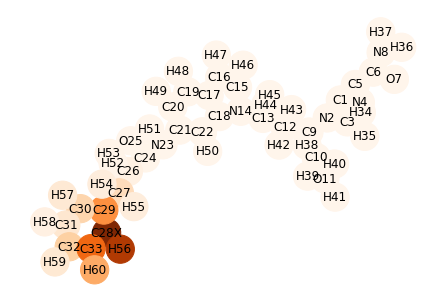

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.5603e-04, 0.0000e+00, 2.8084e-03, 2.2426e-02,
        4.8643e-03, 1.4308e-01, 7.1348e-01, 3.9308e+00, 1.9334e+00, 8.6579e-01,
        4.6401e-01, 9.6869e-01, 2.4870e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.4345e-04, 3.9313e-02, 3.9313e-02, 2.7428e-01,
        2.7428e-01, 3.3221e+00, 3.9034e-01, 1.5573e-01, 4.0424e-01, 1.5346e+00],
       grad_fn=<SumBackward1>)


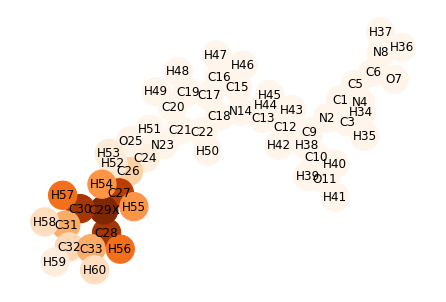

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.1408e-04, 3.4228e-03, 3.1408e-04, 2.7175e-02, 1.4359e-01,
        4.7355e-02, 6.7867e-01, 2.2709e+00, 2.4054e+00, 2.7571e+00, 2.4054e+00,
        1.0592e+00, 5.4395e-01, 1.0592e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.9284e-03, 2.4100e-01, 2.4100e-01, 1.3019e+00,
        1.3019e+00, 1.6605e+00, 1.6605e+00, 4.6570e-01, 1.8446e-01, 4.6570e-01],
       grad_fn=<SumBackward1>)


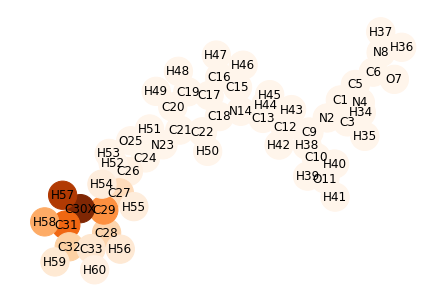

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.5603e-04, 0.0000e+00, 2.8084e-03, 2.2426e-02,
        4.8643e-03, 1.4308e-01, 7.1348e-01, 8.6579e-01, 1.9334e+00, 3.9308e+00,
        2.4870e+00, 9.6869e-01, 4.6401e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.4345e-04, 3.9313e-02, 3.9313e-02, 2.7428e-01,
        2.7428e-01, 3.9034e-01, 3.3221e+00, 1.5346e+00, 4.0424e-01, 1.5573e-01],
       grad_fn=<SumBackward1>)


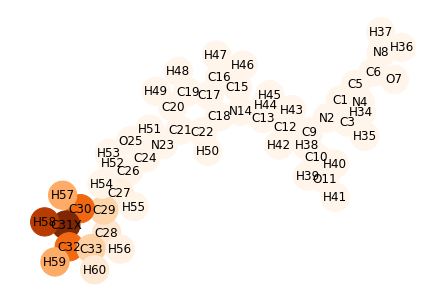

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8447e-04, 3.1600e-03,
        4.9273e-04, 3.1416e-02, 2.2279e-01, 4.9780e-01, 9.3664e-01, 2.6368e+00,
        4.1795e+00, 2.6038e+00, 1.0131e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4732e-03, 5.4732e-03, 6.3876e-02,
        6.3876e-02, 1.6744e-01, 1.6222e+00, 3.4757e+00, 1.6002e+00, 4.2447e-01],
       grad_fn=<SumBackward1>)


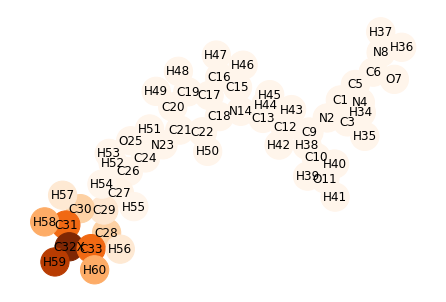

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.3502e-04,
        0.0000e+00, 7.2933e-03, 7.8594e-02, 9.8128e-01, 4.5622e-01, 9.8128e-01,
        2.4950e+00, 3.9953e+00, 2.4950e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 9.2667e-04, 9.2667e-04, 1.4587e-02,
        1.4587e-02, 4.1276e-01, 4.1276e-01, 1.5354e+00, 3.3240e+00, 1.5354e+00],
       grad_fn=<SumBackward1>)


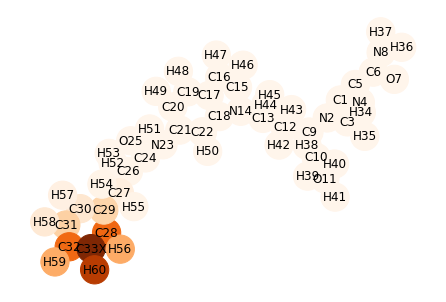

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8448e-04, 3.1600e-03,
        4.9273e-04, 3.1416e-02, 2.2279e-01, 2.6368e+00, 9.3664e-01, 4.9780e-01,
        1.0131e+00, 2.6038e+00, 4.1795e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4732e-03, 5.4732e-03, 6.3876e-02,
        6.3876e-02, 1.6222e+00, 1.6744e-01, 4.2447e-01, 1.6002e+00, 3.4757e+00],
       grad_fn=<SumBackward1>)


In [3]:
import dgl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

if __name__=='__main__':
    # Explain.
    print(" -- Explanation --")
    net_explainer = TypingNetExplainer(typing_utility.net)
    graph = residue[0]
    Rs = net_explainer.LRP(graph)

    # Visualize.    
    g = dgl.to_networkx(graph, node_attrs=[typing_utility.data.features_str])
    pos = nx.kamada_kawai_layout(g)
    for idx_atom in range(graph.nodes().shape[0]):        
        label_dict = {i:
            list(typing_utility.data.periodic_table.keys())[list(typing_utility.data.periodic_table.values()).index(
            graph.ndata[typing_utility.data.features_str][i].item())]+str(i+1) for i in range(0,graph.nodes().shape[0])}

        if int(graph.ndata[typing_utility.data.features_str][idx_atom]) > 1:
            label_dict[idx_atom] += "X"
            nx.draw(g, with_labels=True, 
                pos=pos,
                node_size=800, 
                font_color="black",
                cmap=plt.cm.Oranges,
                node_color=Rs[idx_atom].detach().numpy(),
                labels=label_dict)
            plt.show()
            print(Rs[idx_atom])
